# Peak finder

You can use this notebook to find peaks in your data. If you just want to use it, skip to the section *Running the applet*.

## The code

In [1]:
%matplotlib widget

In [2]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets, fixed

In [3]:
def plot_peaks(df, clip, smoothing, prominence):
    """Search for and plot peaks in data.

    Data outside the start and stop index is not searched for any peaks. Data
    is smoothed by averaging over a triangular window with the width set by
    the smoothing parameter. A plot is shown with the raw data, smoothed data
    inside the clipping window and the detected peaks.

    Args:
        df (pandas.DataFrame): a dataframe containing your data.
        clip (list[int, int]): the start and stop index of the data.
        smoothing (int): the size of the smoothing window.
        prominence (float): the minimum required peak prominence.
    """
    i0, i1 = clip
    smooth = df[i0:i1].rolling(window=smoothing, win_type="triang", center=True).mean()
    x, _ = signal.find_peaks(smooth.I, prominence=prominence)
    print(f"Aantal pieken: {len(x)}")

    for art in plt.gca().lines:
        art.remove()
    plt.plot(df.t, df.I, "lightgray")
    plt.plot(smooth.t, smooth.I, "dimgray")
    plt.plot(smooth.t.iloc[x], smooth.I.iloc[x], "x", c="darkorange")

In [4]:
def find_peaks(path):
    """Find peaks in the data using an applet.

    This function will display sliders to easily interact with the peak
    finding algorithm and a plot showing the detected peaks.

    Args:
        path (str): path to the data file.
    """
    df = pd.read_csv(path, names=["t", "I"], sep=None, engine="python")
    plt.figure()
    max_idx = len(df) - 1
    wide = widgets.Layout(width="500px")
    interact(
        plot_peaks,
        df=fixed(df),
        clip=widgets.IntRangeSlider(
            value=[0, max_idx], min=0, max=max_idx, step=1, layout=wide
        ),
        smoothing=widgets.IntSlider(value=1, min=1, max=25, layout=wide),
        prominence=widgets.FloatSlider(
            value=0.05, min=0.0, max=0.1, step=0.001, readout_format=".3f", layout=wide
        ),
    )

## Running the applet

Change the path name in the `find_peaks()` call and run the cell to count the peaks in your data.

interactive(children=(IntRangeSlider(value=(0, 14199), description='clip', layout=Layout(width='500px'), max=1…

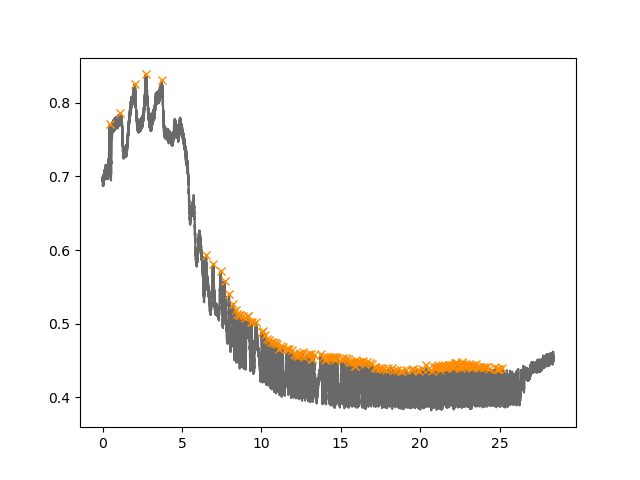

In [5]:
find_peaks("proefmeting 15 graden zonder.csv")